In [1]:
import os
import pandas as pd
import numpy as np
from featurewiz import featurewiz
from matplotlib import pyplot as plt

import json


folder = os.path.join("/", "RD", "CREMEv2_Result", "20230207", "logs", "label_syslog")

if os.path.exists(folder):
    print("Path is exist!!!")
    filename_label = 'label_syslog_ready.csv'
    label_technique = 'labels_technique.json'
    label_lifecycle = 'labels_lifecycle.json'
else:
    print("Path is not exist!!!")

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

Path is exist!!!


In [2]:
df = pd.read_csv(os.path.join(folder, filename_label))
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16560 entries, 0 to 16559
Data columns (total 47 columns):
 #   Column                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                 --------------  -----  
 0   EventTemplate_[ 9672.601533] ------------[ cut here ]------------                                                                                                                                                      16560 non-null  int64  
 1   EventTemplate_[ 9674.679853] e1000: enp0s3 NIC Link is Up 1000 Mbps Full Duplex, Flow Control: RX                                                         

,EventTemplate_[ 9672.601533] ------------[ cut here ]------------,"EventTemplate_[ 9674.679853] e1000: enp0s3 NIC Link is Up 1000 Mbps Full Duplex, Flow Control: RX",EventTemplate_[ 9675.800664] IPv6: enp0s3: IPv6 duplicate address fd36:97d8:258c::3c0 used by <*>:2b:0c:bd detected!,EventTemplate_Accepted password for root from <*> port <*> ssh2,EventTemplate_Connection closed by <*> [preauth],EventTemplate_Did not receive identification string from <*>,EventTemplate_FAILED LOGIN <*> on <*> from '<*>' FOR <*> Authentication failure,EventTemplate_Finished Ubuntu Advantage Timer for running repeated jobs.,"EventTemplate_""GET <*> <*> 200 <*> ""-"" <*>","EventTemplate_""GET /chat/read_log.php HTTP/1.1"" 404 <*> ""about:blank"" ""Node.js (linux; U; rv:v4.9.1) AppleWebKit/537.36 (KHTML, like Gecko)""",...,EventTemplate_warning: non-SMTP command from unknown[<*>]: <*> <*>,EventTemplate_warning: non-SMTP command from unknown[<*>]: <*>,EventTemplate_warning: unknown[<*>]: SASL NTLM authentication failed: Invalid authentication mechanism,Timestamp,EventTemplate_connect from unknown[<*>],EventTemplate_pam_unix(samba:session): session closed for user nobody,EventTemplate_(root) CMD ( cd / && run-parts --report /etc/cron.hourly),EventTemplate_pam_unix(cron:session): session opened for user root by (uid=0),EventTemplate_Protocol major versions differ for <*>: SSH-2.0-OpenSSH_6.6.1p1 Ubuntu-2ubuntu2.13 vs. <*>,Label
count,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,...,16560.000000,16560.000000,16560.000000,1.656000e+04,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000,16560.000000
mean,0.000060,0.000060,0.000060,0.000242,0.025121,0.000302,0.001630,0.000060,1.804469,0.445531,...,0.000302,0.000785,0.000604,1.675420e+09,4.923188,0.001510,0.000604,0.000966,0.000604,5.347222
std,0.007771,0.007771,0.007771,0.015540,0.160685,0.017374,0.040347,0.007771,3.574785,0.497039,...,0.017374,0.030087,0.026913,3.107599e+03,27.098842,0.053255,0.024567,0.031069,0.026913,6.000601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.675414e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.675417e+09,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.675420e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.675422e+09,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,1.000000,2.000000,2.000000,1.675425e+09,434.000000,3.000000,1.000000,1.000000,2.000000,17.000000


In [3]:
print(df['Label'].unique())
print(len(df['Label']))
print(len(df[df['Label'] == 0]))

[ 1  0  2  3  9 11 12 13  4  6  8 14  7 15 16 10 17]
16560
3569


In [5]:
df.tail()


,"EventTemplate_""GET /chat/read_log.php HTTP/1.1"" 404 <*> ""about:blank"" ""Node.js (linux; U; rv:v4.9.1) AppleWebKit/537.36 (KHTML, like Gecko)""","EventTemplate_""GET <*> <*> 200 <*> ""-"" <*>","EventTemplate_""GET <*> HTTP/1.1"" <*> <*> ""-"" ""Mozilla/5.0 (compatible; Nmap Scripting Engine; https://nmap.org/book/nse.html)""","EventTemplate_""NFQM / HTTP/1.1"" 501 496 ""-"" ""Mozilla/5.0 (compatible; Nmap Scripting Engine; https://nmap.org/book/nse.html)""","EventTemplate_""OPTIONS / HTTP/1.1"" 200 180 ""-"" ""Mozilla/5.0 (compatible; Nmap Scripting Engine; <*>","EventTemplate_""POST /chat/post.php HTTP/1.1"" 404 <*> ""about:blank"" ""Node.js (linux; U; rv:v4.9.1) AppleWebKit/537.36 (KHTML, like Gecko)""","EventTemplate_""POST <*> HTTP/1.1"" <*> <*> ""-"" ""Mozilla/5.0 (compatible; Nmap Scripting Engine; https://nmap.org/book/nse.html)""","EventTemplate_""PROPFIND / HTTP/1.1"" 405 533 ""-"" ""Mozilla/5.0 (compatible; Nmap Scripting Engine; https://nmap.org/book/nse.html)""","EventTemplate_""UFVS / HTTP/1.1"" 501 496 ""-"" ""Mozilla/5.0 (compatible; Nmap Scripting Engine; https://nmap.org/book/nse.html)""","EventTemplate_""ULCV / HTTP/1.1"" 501 496 ""-"" ""Mozilla/5.0 (compatible; Nmap Scripting Engine; https://nmap.org/book/nse.html)""",...,EventTemplate_pam_unix(login:auth): authentication failure; logname= uid=0 euid=0 <*> ruser= rhost=<*> user=root,EventTemplate_pam_unix(samba:session): session closed for user nobody,EventTemplate_statistics: max cache size <*> at Feb 3 <*>,EventTemplate_statistics: max connection <*> <*> for <*> at Feb 3 <*>,EventTemplate_warning: TLS library problem: <*> <*> <*>,EventTemplate_warning: non-SMTP command from unknown[<*>]: <*>,EventTemplate_warning: non-SMTP command from unknown[<*>]: <*> <*>,EventTemplate_warning: unknown[<*>]: SASL NTLM authentication failed: Invalid authentication mechanism,Timestamp,Label
16555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.675423e+09,0
16556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.675421e+09,0
16557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.675421e+09,0
16558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.675419e+09,0
16559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.675422e+09,0


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Caution: We will try to reduce the memory usage of dataframe from 1837.19 MB
        memory usage after optimization is: 389.41 MB
        decreased by 78.8%
    Loaded train data. Shape = (5234886, 46)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename

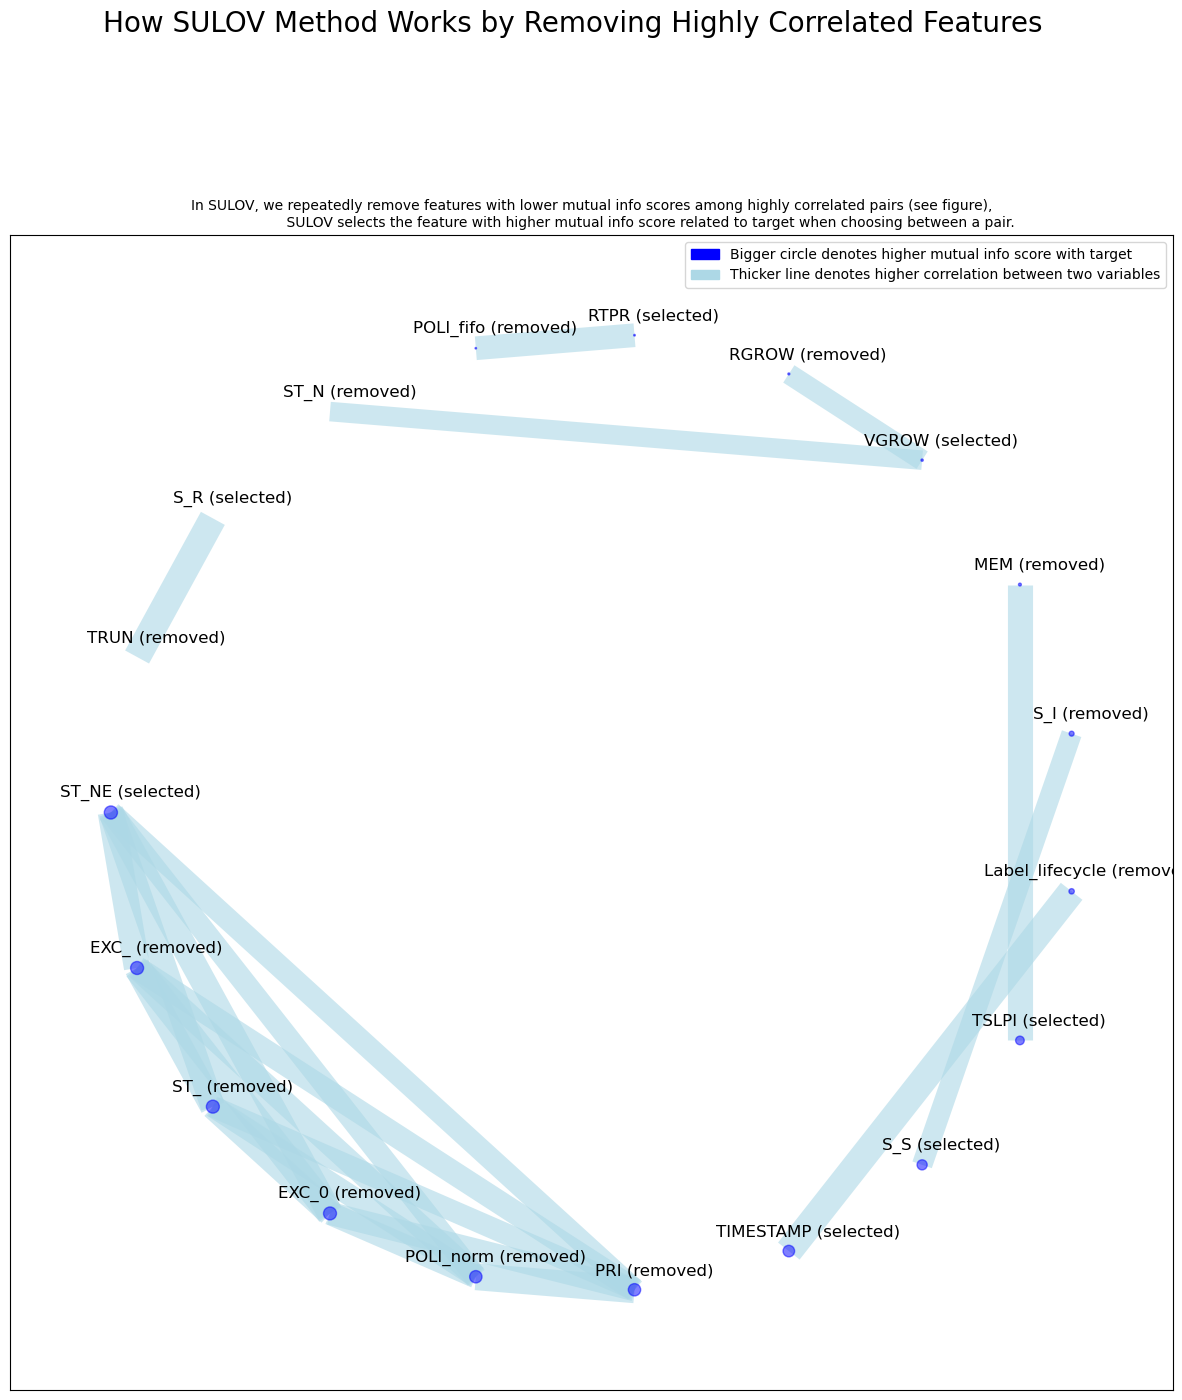

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 30
Final list of selected 30 vars after SULOV = ['CPU', 'CPUNR', 'DSK', 'EXC_1', 'EXC_255', 'MAJFLT', 'MINFLT', 'NICE', 'POLI_', 'POLI_rr', 'RDDSK', 'RSIZE', 'ST_E', 'ST_NS', 'ST_S', 'S_D', 'S_E', 'S_Z', 'TSLPU', 'VSIZE', 'VSTEXT', 'WCANCL', 'WRDSK', 'ST_NE', 'TIMESTAMP', 'S_S', 'TSLPI', 'VGROW', 'RTPR', 'S_R']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 30 
    Taking top 10 features per iteration...
    XGBoost version using 1.7.1 as tree method: hist
Number of booster rounds = 20
        using 30 variables...
Regular 

In [24]:
features = featurewiz(df, target='Label', corr_limit=0.70, verbose=2)